# Getting Started with STIM simulations for Fermionic Encodings

## Using currently available encoding classes

In [1]:
from encoding.CompactEncoding import CompactEncoding
from encoding.TernaryEncoding import TernaryEncoding
from encoding.JWEncoding import JWEncoding
from hamiltonians.FermionHamiltonian import FermionHamiltonian
from hamiltonians.QubitHamiltonian import QubitHamiltonian
from simulation.Simulation import Simulation
import numpy as np
import pandas as pd

### Hamiltonians and Encodings

Create a Fermionic Hamiltonian. This is a 4x4 square lattice Fermi-Hubbard with the subset of terms at 5% of the total number.
Adding the hermitian conjugate is a hack that reduces the number of repetitive terms due to the way conversion to the rotation operators is implemented. 

In [2]:
fh = FermionHamiltonian(fermi_hubbard=True, L=4, seed=42, subset_size=.05, periodic=False, add_hermitian_conjugate=True)

te = TernaryEncoding(fh)
ce = CompactEncoding(fh)
jw = JWEncoding(fh)

We can take a look at the generated fermionic Hamiltonian as a FermionOperator (from openfermion):

In [13]:
fh.full_hamiltonian

-0.25 [0^ 0] +
1.0 [0^ 0 1^ 1] +
1.0 [0^ 0 4^ 4] +
-2.0 [0^ 1] +
-2.0 [0^ 4] +
-2.0 [1^ 0] +
-0.25 [1^ 1] +
1.0 [1^ 1 2^ 2] +
1.0 [1^ 1 5^ 5] +
-2.0 [1^ 2] +
-2.0 [1^ 5] +
-2.0 [2^ 1] +
-0.25 [2^ 2] +
1.0 [2^ 2 3^ 3] +
1.0 [2^ 2 6^ 6] +
-2.0 [2^ 3] +
-2.0 [2^ 6] +
-2.0 [3^ 2] +
-0.25 [3^ 3] +
1.0 [3^ 3 7^ 7] +
-2.0 [3^ 7] +
-2.0 [4^ 0] +
-0.25 [4^ 4] +
1.0 [4^ 4 5^ 5] +
1.0 [4^ 4 8^ 8] +
-2.0 [4^ 5] +
-2.0 [4^ 8] +
-2.0 [5^ 1] +
-2.0 [5^ 4] +
-0.25 [5^ 5] +
1.0 [5^ 5 6^ 6] +
1.0 [5^ 5 9^ 9] +
-2.0 [5^ 6] +
-2.0 [5^ 9] +
-2.0 [6^ 2] +
-2.0 [6^ 5] +
-0.25 [6^ 6] +
1.0 [6^ 6 7^ 7] +
1.0 [6^ 6 10^ 10] +
-2.0 [6^ 7] +
-2.0 [6^ 10] +
-2.0 [7^ 3] +
-2.0 [7^ 6] +
-0.25 [7^ 7] +
1.0 [7^ 7 11^ 11] +
-2.0 [7^ 11] +
-2.0 [8^ 4] +
-0.25 [8^ 8] +
1.0 [8^ 8 9^ 9] +
1.0 [8^ 8 12^ 12] +
-2.0 [8^ 9] +
-2.0 [8^ 12] +
-2.0 [9^ 5] +
-2.0 [9^ 8] +
-0.25 [9^ 9] +
1.0 [9^ 9 10^ 10] +
1.0 [9^ 9 13^ 13] +
-2.0 [9^ 10] +
-2.0 [9^ 13] +
-2.0 [10^ 6] +
-2.0 [10^ 9] +
-0.25 [10^ 10] +
1.0 [10^ 10 11^ 11] +
1.0 [10^

Let's implement the simplest STIM circuits from all three encodings. These circuits implement noiseless versions of circuits with occupation basis measurement and the number of logical rotations that's 5% of the Hamiltonian terms. No postselection is implemented here.

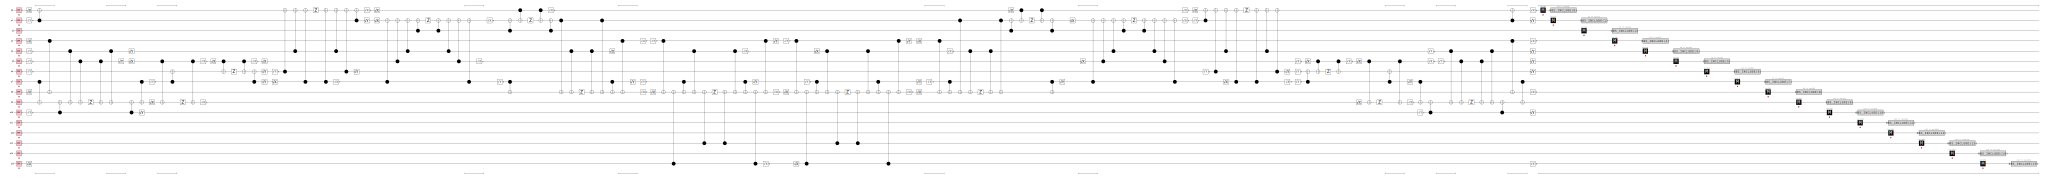

In [ ]:
circuit, _, _, _, _, _, _, _ = te.get_stim_circuit(stabilizer_reconstruction=False, non_destructive_stabilizer_measurement_end=False,
                    virtual_error_detection_rate=0, flags_in_synd_extraction=False,
                    type_of_logical_observables='Z', global_parity_postselection=False,
                    efficient_trotter_steps=False, p1=0, p2=0, psp=0, pi=0, pm=0)
circuit.diagram('timeline-svg')

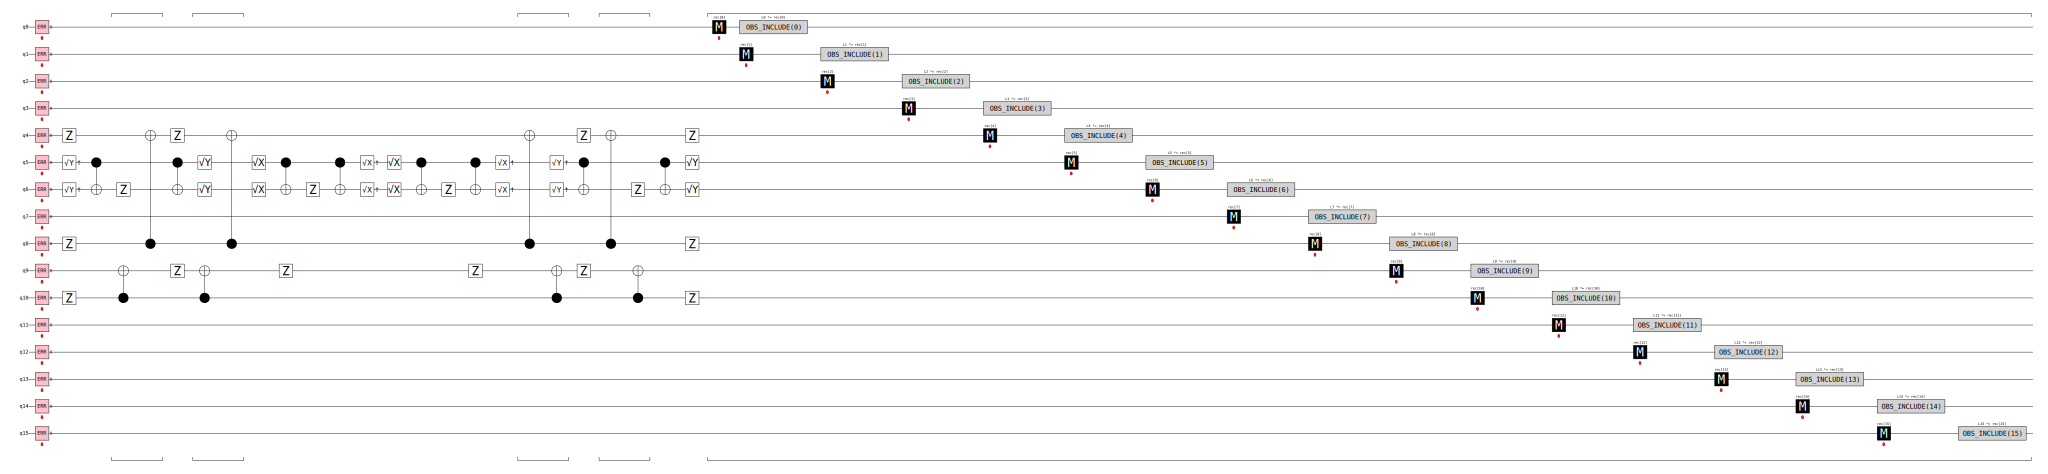

In [ ]:
circuit, _, _, _, _, _, _, _ = jw.get_stim_circuit(stabilizer_reconstruction=False, non_destructive_stabilizer_measurement_end=False,
                    virtual_error_detection_rate=0, flags_in_synd_extraction=False,
                    type_of_logical_observables='Z', global_parity_postselection=False,
                    efficient_trotter_steps=False, p1=0, p2=0, psp=0, pi=0, pm=0)
circuit.diagram('timeline-svg')

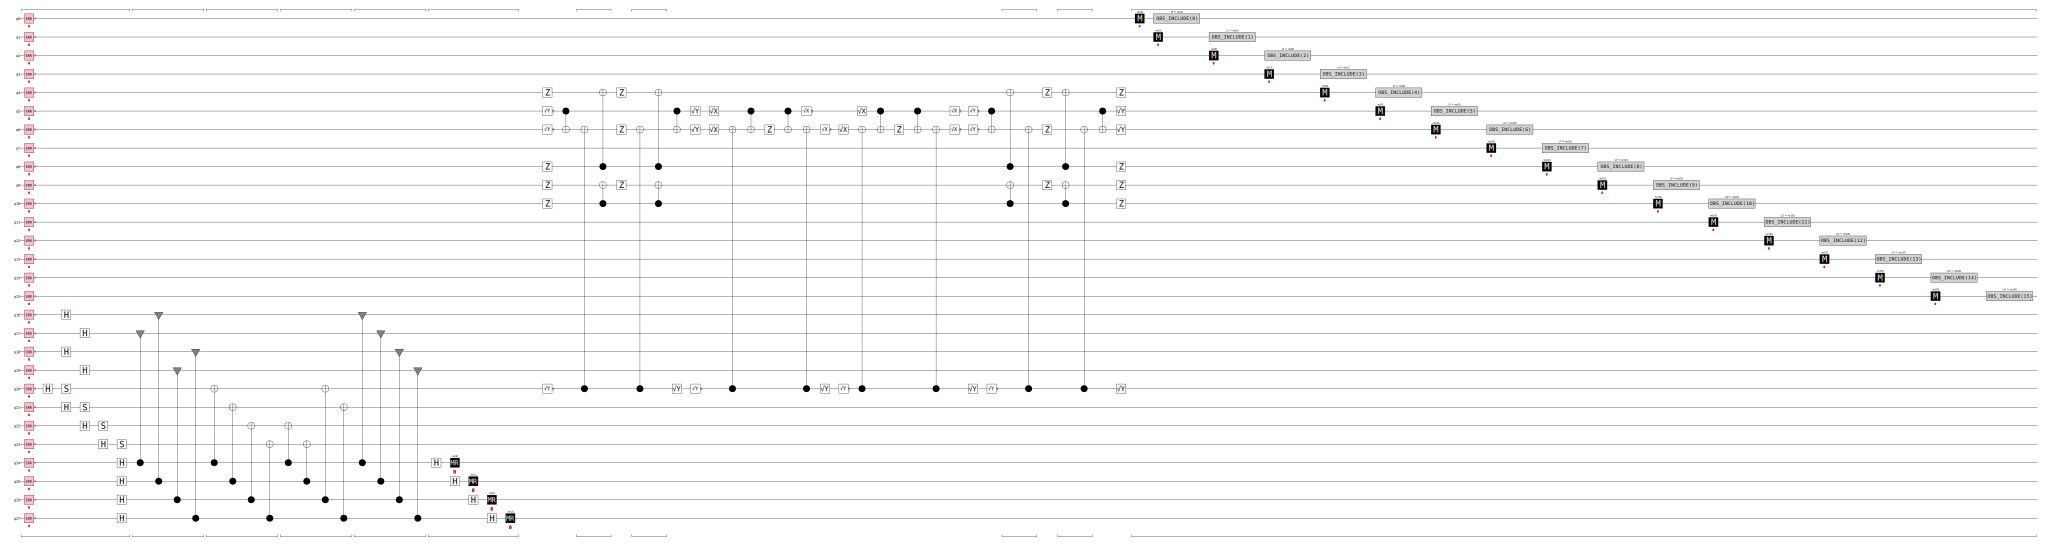

In [ ]:
circuit, _, _, _, _, _, _, _ = ce.get_stim_circuit(stabilizer_reconstruction=False, non_destructive_stabilizer_measurement_end=False,
                    virtual_error_detection_rate=0, flags_in_synd_extraction=False,
                    type_of_logical_observables='Z', global_parity_postselection=False,
                    efficient_trotter_steps=False, p1=0, p2=0, psp=0, pi=0, pm=0)
circuit.diagram('timeline-svg')

Note: Compact Encoding circuit involves a non-unitary encoding step described in the paper. 

Implementation of STIM circuit generation is the only hard requirement for implementing simulations. Although the Simulation class currently accesses certain internal functions of encoding classes, it is only to store additional parameters of circuits.

### Setting up simulations

We used Simulation class to run many simulations with varying inputs via input datasets. Therefore, the initialization of a Simulation takes in a row of a DataFrame as input.

In [32]:
input_df = pd.read_csv('input.csv')
input_df = input_df.drop_duplicates()
input_df.to_csv('input.csv', index=False)

In [29]:
input_df = pd.DataFrame({
    'encoding': ['Ternary'],
    'lattice_size': [4],
    'stabilizer_reconstruction': [False],
    'non_destructive_stabilizer_measurement_end': [False],
    'virtual_error_detection_rate': [0],
    'flags_in_synd_extraction': [False],
    'type_of_logical_observables': ['Z'],
    'global_parity_postselection': [False],
    'efficient_trotter_steps': [False],
    'p1': [0],
    'p2': [0],
    'psp': [0],
    'pi': [0],
    'pm': [0],
    'fermion_hamiltonian_descr': ['fermi_hubbard'],
    'boundary_conditions': ['periodic'],
    'rand_seed': [42],
    'logical_operators_depth': [0.05],
    'error_model': ["(1, 1, 1, 1, 0)"],
    'n_shots': [1000],
    'bootstrap_resamples': [100]
})

In [27]:
sim_te = Simulation(input_df, 'test_output')

c:\Users\e2dyrenk\Documents\FermiStabilizers\simulation\Simulation.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  self.lattice_size = int(data_frame['lattice_size'])#.iloc[0])
c:\Users\e2dyrenk\Documents\FermiStabilizers\simulation\Simulation.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  self.rand_seed = int(data_frame['rand_seed'])#.iloc[0]
c:\Users\e2dyrenk\Documents\FermiStabilizers\simulation\Simulation.py:56: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  self.filename_prefix = f"{self.encoding}{self.lattice_size}{int(self.logical_operators_depth*100)}{int(self.efficient_trotter_steps*100)}{int(self.virtual_error_detection_rate*100)}{int(self.stabilizer_reconstruction)}{int(self.flags_in_s

## Creating custom encodings